# Assignment B
This section will cover questions related to the analysis of the dataCompany dataset, which can be downloaded from Moodle. A brief introduction to the dataset's variables is provided in the Data Information document.

In [673]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1
Load the data and study the structure of the dataset.

How many observations are contained in this dataset?

In [674]:
df = pd.read_csv("dataCompany.csv",sep=";")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            312 non-null    object 
 1   Product.Category   312 non-null    object 
 2   Week               312 non-null    int64  
 3   Weekly.Units       312 non-null    int64  
 4   Price              312 non-null    int64  
 5   Cost               312 non-null    int64  
 6   Department         312 non-null    object 
 7   Marketing.Expense  312 non-null    int64  
 8   Online.Views       312 non-null    int64  
 9   Online.Purchases   312 non-null    int64  
 10  Online.Rating      312 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 26.9+ KB
None


## Question 2
How many numeric and integer variables are (combined) contained in the data?

Please provide your answer as an integer value e.g. 10.

In [675]:
num_cols = df.select_dtypes("number").columns.to_list()
print(f"Number of numeric columns: {len(num_cols)}")

Number of numeric columns: 8


## Question 3
Are there some missing values (e.g., NaN) in the dataset?

In [676]:
print(df.isnull().sum()) # no

Product              0
Product.Category     0
Week                 0
Weekly.Units         0
Price                0
Cost                 0
Department           0
Marketing.Expense    0
Online.Views         0
Online.Purchases     0
Online.Rating        0
dtype: int64


## Question 4
How many unique products are there in the data set?

In [677]:
unique_products = set(df["Product"].to_list())
print(f"Number of unique products: {len(unique_products)}")

Number of unique products: 6


## Question 5
Which product is the most expensive one?

(Even with possible price changes, one product is consistently more expensive than the other products)

In [678]:
print(df.groupby("Product")["Price"].max())

Product
Conference System    2399
Fitness Tracker       169
Laptop               1925
Smartphone            899
Tablet                549
Tablet Pro            749
Name: Price, dtype: int64


## Question 6
Match each product with the best description of how its price changes over the year (e.g. constant, increase, or decrease).

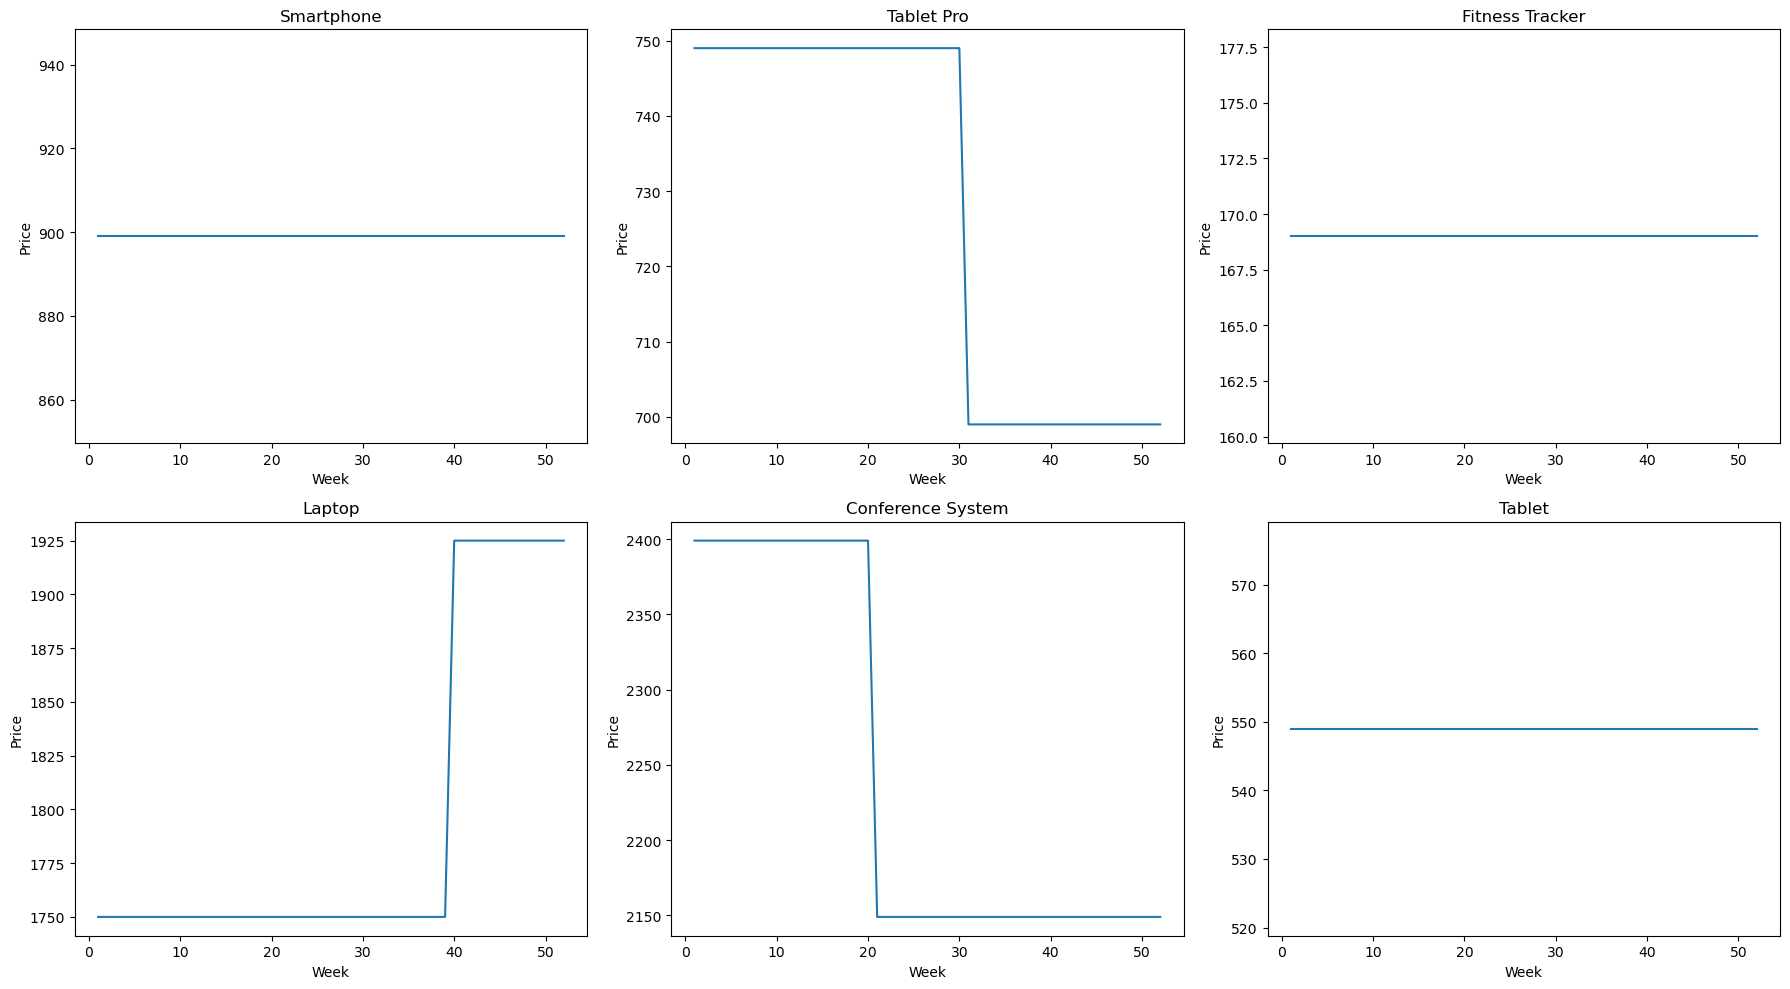

In [679]:
fig1, ax1 = plt.subplots(2,len(unique_products)//2,figsize=(18,10))
ax1 = ax1.flatten() # makes ax1 easier to loop through

for i, p in enumerate(unique_products):
    
    mask = df["Product"] == p
    data = df[["Price","Week"]][mask]
    ax1[i].plot(data["Week"],data["Price"]) # x: week, y: price

    ax1[i].set_xlabel("Week")
    ax1[i].set_ylabel("Price")
    ax1[i].set_title(p)

plt.tight_layout()
plt.show()

## Question 7
Instead of using the marketing spending ('Marketing.Expense') directly, you would like to use only three simple categories. Categorize the observations in the data as "Low", "Medium" and "High" according to the following ranges of the marketing spending (variable "Marketing.Expense").

Low: if the marketing spending is less than 5000

Medium: if the marketing spending is between 5000 (including) and 20000 (excluding)

High: if the marketing spending is equal to or greater than 20000

 

The idea of this task is to create a new variable called "Expense_levels", which categorizes the marketing spending into the categories "Low", "Medium" and "High" based on the above ranges.

With the new categorical variable you created, answer the following question.

How many products fall into the “Medium” expense level?

 

Note: Each product remains in the same category for the entire year. Only count how many distinct products fall into the "Medium" category (not the total number of rows/observations). For example, the answer might be 5 products.

In [680]:
def group_labels(expense):
    if expense < 5000:
        return "Low"
    elif expense >= 5000 and expense < 20000:
        return "Medium"
    else:
        return "High"

# Applies the above function to the Marketing.Expense column observations
df["Expense_levels"] = df["Marketing.Expense"].apply(group_labels)

mask_medium = df["Expense_levels"] == "Medium"

med_products = set((list(df["Product"][mask_medium])))

print(f"Number of products with medium expense level: {len(med_products)}")

Number of products with medium expense level: 3


## Question 8
Using the previously created levels for the marketing expenses (called "Expense_levels"),  which category does the marketing spending of the "Tablet Pro" belong to?

In [681]:
print(df[["Product","Expense_levels"]][df["Product"] == "Tablet Pro"].drop_duplicates())

        Product Expense_levels
260  Tablet Pro         Medium


## Question 9
Which product has the highest average online rating during the year?

In [682]:
avg_ratings = df.groupby(["Product"])[["Online.Rating"]].mean().reset_index()
print(avg_ratings)
print(f"\nHighest average online rating:")
print(f"{avg_ratings[avg_ratings["Online.Rating"] == avg_ratings["Online.Rating"].max()]}")

             Product  Online.Rating
0  Conference System       3.798077
1    Fitness Tracker       4.748077
2             Laptop       3.798077
3         Smartphone       3.978846
4             Tablet       4.169231
5         Tablet Pro       3.648077

Highest average online rating:
           Product  Online.Rating
1  Fitness Tracker       4.748077


## Question 10
Which product has the highest average marketing spending ("Marketing.Expense"") during the year?

In [683]:
avg_marketing = df.groupby(["Product"])[["Marketing.Expense"]].mean().reset_index()
print(avg_marketing)
print(f"\nHighest average marketing expense:")
print(f"{avg_marketing[avg_marketing["Marketing.Expense"] == avg_marketing["Marketing.Expense"].max()]}")

             Product  Marketing.Expense
0  Conference System       28517.692308
1    Fitness Tracker        2494.557692
2             Laptop       51208.384615
3         Smartphone        8744.115385
4             Tablet        8781.423077
5         Tablet Pro        7903.384615

Highest average marketing expense:
  Product  Marketing.Expense
2  Laptop       51208.384615


## Question 11
You analyze how the marketing spending ("Marketing.Expense") changes over time and see that the marketing spending for most products is relative stable over time. However, there is one product for which the marketing expenses increase abruptly in the middle of the year. Which product is that?

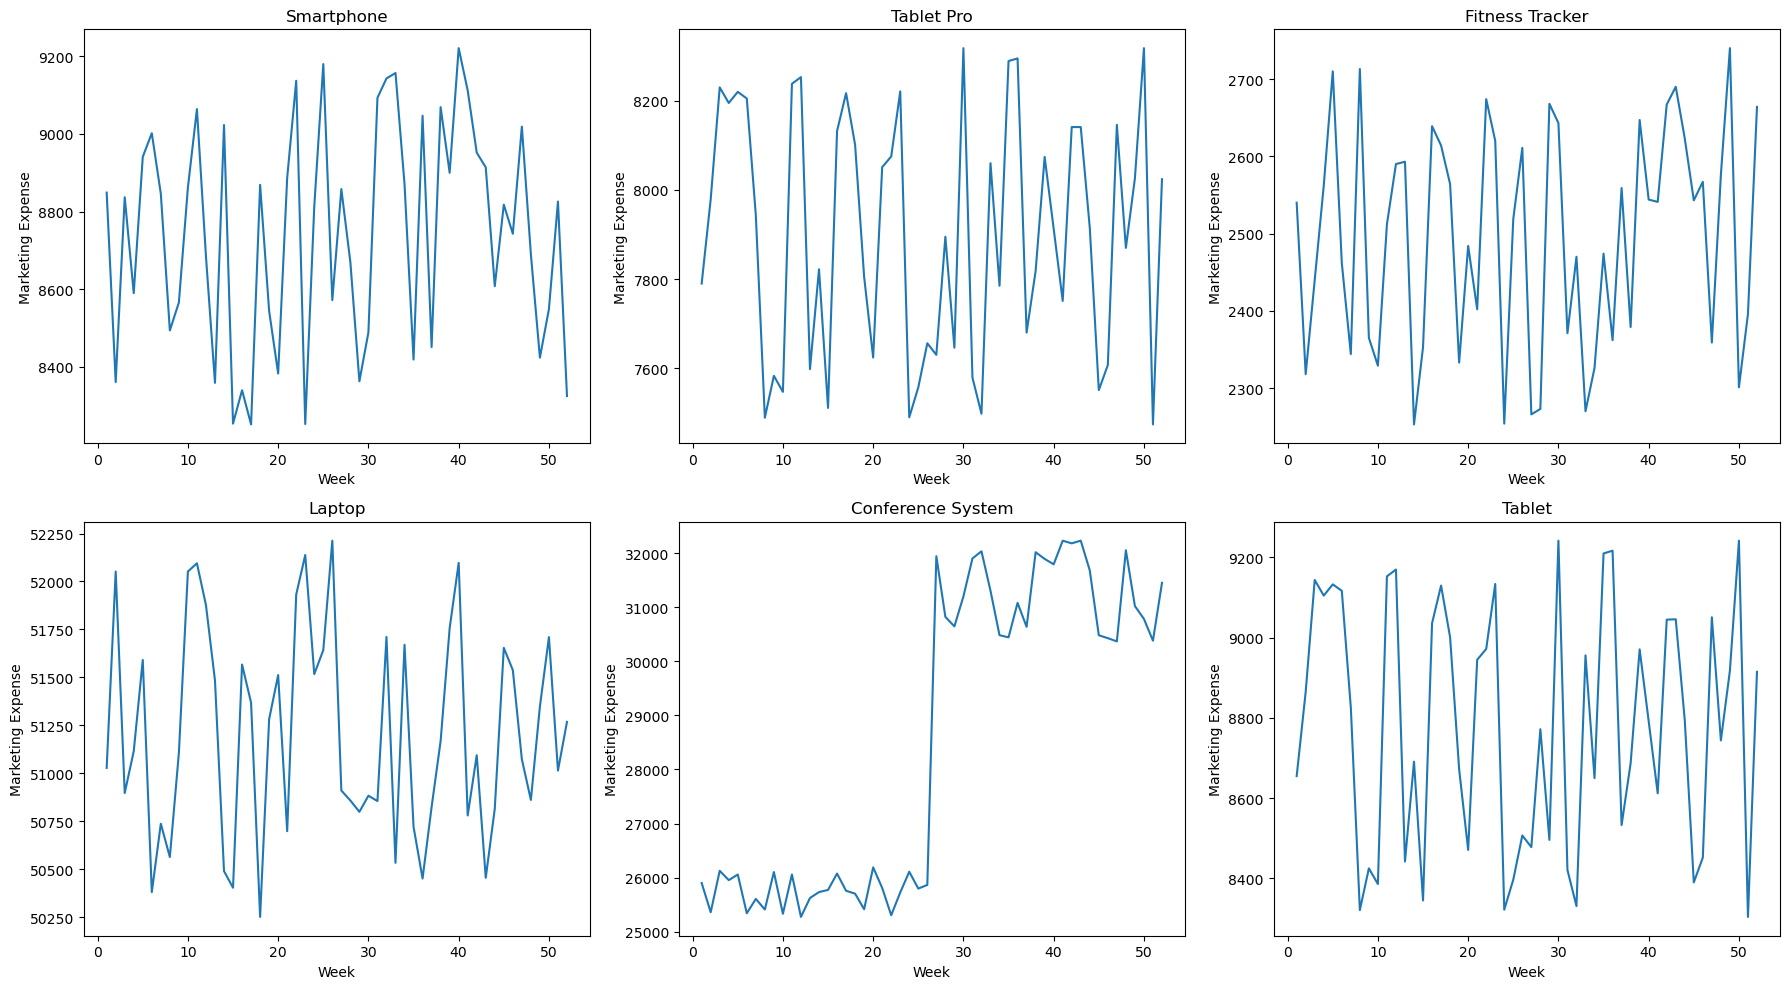

In [684]:
fig2, ax2 = plt.subplots(2,len(unique_products)//2,figsize=(18,10))
ax2 = ax2.flatten()

for i,p in enumerate(unique_products):
    # one product per each iteration
    data = df[["Week","Marketing.Expense"]][df["Product"] == p]
    ax2[i].plot(data["Week"],data["Marketing.Expense"])

    ax2[i].set_xlabel("Week")
    ax2[i].set_ylabel("Marketing Expense")
    ax2[i].set_title(p)

plt.tight_layout()
plt.show()

## Question 12
You analyze how the marketing spending ("Marketing.Expense") is linked to the prices of the products. What is the correlation between the marketing spending and the price ("Price") of products during the entire year?

 

Remark: please provide the answer with two decimal points e.g. 0.51

In [685]:
print(round(df["Marketing.Expense"].corr(df["Price"]),2))

0.81


## Question 13
You now analyze how the marketing spending ("Marketing.Expense") is linked to weekly units sold ("Weekly.Units") and, thus, whether a higher marketing spending is associated with higher weekly sales. What is the correlation between the marketing spending and the weekly units sold of products during the entire year?

 

Remark: please provide the answer with two decimal points e.g. 0.51

In [686]:
print(round(df["Marketing.Expense"].corr(df["Weekly.Units"]),2))

0.37


## Question 14
You now analyze how the number of products sold per week ("Weekly.Units") is linked to the important variables: "Price", "Cost", "Marketing.Expense", "Online.Views", "Online.Purchases", and "Online.Rating".

Which two of these variables have the highest (positive) correlation with the weekly units sold?

1. "Price" & "Cost"
2. "Price" & "Marketing.Expense"
3. "Marketing.Expense" & "Online.Views"
4. "Price" & "Online.Views"
5. "Online.Views" & "Online.Purchases"
6. "Online.Views" & "Online.Rating"
7. "Marketing.Expense" & "Online.Rating"
8. The correlation with all of these variables is negative


In [687]:
var_names = "Price Cost Marketing.Expense Online.Views Online.Purchases Online.Rating".split()

for v in var_names:
    print(f"Correlation: {round(df["Weekly.Units"].corr(df[v]),4)} ({v})")

Correlation: 0.0653 (Price)
Correlation: 0.5363 (Cost)
Correlation: 0.3681 (Marketing.Expense)
Correlation: 0.9509 (Online.Views)
Correlation: 0.9538 (Online.Purchases)
Correlation: 0.2237 (Online.Rating)


## Question 15
Using the dataCompany dataset and based on the analysis so far (and any additional analysis to check the answer options below) which of the following conclusions can be drawn?

1. The most expensive product is the "Laptop" and it is also associated with the highest marketing spending ('Marketing.Expense')

2. The majority of products does not experience any changes in price over the year, only two products increased(+) in price, whereas one other product decreased(-) in price

3. The majority of products is associated with a "Medium" level of marketing spending, and only one product has a "Low" and two products have a "High" level of marketing spending

4. The weekly units is close to a perfect positive correlation to both the online views and the online purchases of a product

5. The "Tablet Pro" has the lowest average online rating (averaged over the year) - worse than the (regular) "Tablet" - and its price was decreased during the year

Please provide the most complete, correct answer.

1. False, conference system is the most expensive.
2. False, half of the product prices remained constant and two propducts decreased in price, whereas the remaining one increased in price.
3. True, as seen from the code output below.
4. True, the correlations are above .95 for both variables as seen from question 14 output.
5. True, question 9 shows that Tablet Pro had an average rating of 3.64, whereas the regular Tablet had a rating of 4.16. The price also dropped, as seen from question 6.

In [688]:
# 3
print(df[["Product","Expense_levels"]].drop_duplicates().reset_index(drop=True))

             Product Expense_levels
0  Conference System           High
1    Fitness Tracker            Low
2             Laptop           High
3         Smartphone         Medium
4             Tablet         Medium
5         Tablet Pro         Medium
